<h1>Lab | Customer Analysis Round 7<h1>

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme()
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import sklearn.metrics as metrics
from sklearn.preprocessing import PowerTransformer

data = pd.read_csv('./files_for_lab/csv_files/marketing_customer_analysis.csv')
data2 = data.copy()
data_tr = data.copy()

In [23]:
def cleaner_processor(df):
    df = df.drop_duplicates()
    df = df.reset_index(drop = True)
    cols = []
    for col in df.columns:
        cols.append(col.lower().replace(' ', '_'))
    df.columns = cols
    df = df.select_dtypes(include = np.number)
    df = df.round(decimals = 2)
    correlation_matrix = df.corr() #Saving this for later
    df = df[df.income != 0]
    df2 = df['total_claim_amount']
    df = df.drop(['total_claim_amount'], axis=1)
    X=df
    y=df2
    print()
    '''
    DF cleaned and split into X and y.
    
    We will now display correlation matrix and heatmap for DF
    including and excluding the dropped rows.
    We had previously saved the dataframe before the rows were dropped.
    '''
    print('This is the correlations matrix before dropping zero income rows')
    display(correlation_matrix)
    print('This is the correlations matrix after dropping zero income rows')
    correlations_matrix = X.corr()
    display(correlations_matrix)
    print('This is the heatmap for both versions')
    fig, axes = plt.subplots(1,2,figsize=(15,5), dpi=200)
    sns.heatmap(correlation_matrix, annot=True, ax=axes[0])
    axes[0].set_xlabel('Including 0 income')
    sns.heatmap(correlations_matrix, annot=True, ax=axes[1])
    axes[1].set_xlabel('Excluding 0 income')
    plt.show()
    print()
    '''
    Train and test, linear regression
    '''
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=75)
    print('\nLinear regression, X and y train / test\n')
    print('This is the shape of X train: \n', X_train.shape)
    print('This is the shape of X test: \n', X_test.shape)
    print('This is the shape of y train: \n', y_train.shape)
    print('This is the shape of y test: \n', y_test.shape)
    print()
    lm = LinearRegression()
    lm.fit(X_train,y_train)
    
    y_pred_train = lm.predict(X_train)
    y_pred_test = lm.predict(X_test)
    print('\nError tests\n')
    print(f'R2 train = {r2_score(y_train, y_pred_train):.4f}')
    print(f'R2 test = {r2_score(y_test, y_pred_test):.4f}')
    print()
    print(f'RMSE train = {(np.sqrt(mean_squared_error(y_train,y_pred_train))):.4f}')
    print(f'RMSE test = {(np.sqrt(mean_squared_error(y_test,y_pred_test))):.4f}')
    print()
    print (f'MAE train = {(metrics.mean_absolute_error(y_train, y_pred_train)):.4f}')
    print (f'MAE test = {(metrics.mean_absolute_error(y_test, y_pred_test)):.4f}')
    print()
    print (f'MSE train = {(metrics.mean_squared_error(y_train, y_pred_train)):.4f}')
    print (f'MAE test = {(metrics.mean_squared_error(y_test, y_pred_test)):.4f}')
    
    return
            



This is the correlations matrix before dropping zero income rows


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
monthly_premium_auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
months_since_last_claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
months_since_policy_inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
number_of_open_complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
number_of_policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
total_claim_amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


This is the correlations matrix after dropping zero income rows


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
customer_lifetime_value,1.000000,0.002915,0.399491,0.018531,0.011275,-0.025038,0.022683
income,0.002915,1.000000,-0.012372,-0.034453,0.015799,0.016642,-0.001324
monthly_premium_auto,0.399491,-0.012372,1.000000,0.005887,0.020112,-0.006476,-0.026795
months_since_last_claim,0.018531,-0.034453,0.005887,1.000000,-0.039993,0.007744,0.017022
months_since_policy_inception,0.011275,0.015799,0.020112,-0.039993,1.000000,0.005763,-0.020548
number_of_open_complaints,-0.025038,0.016642,-0.006476,0.007744,0.005763,1.000000,0.010004
number_of_policies,0.022683,-0.001324,-0.026795,0.017022,-0.020548,0.010004,1.000000


This is the heatmap for both versions


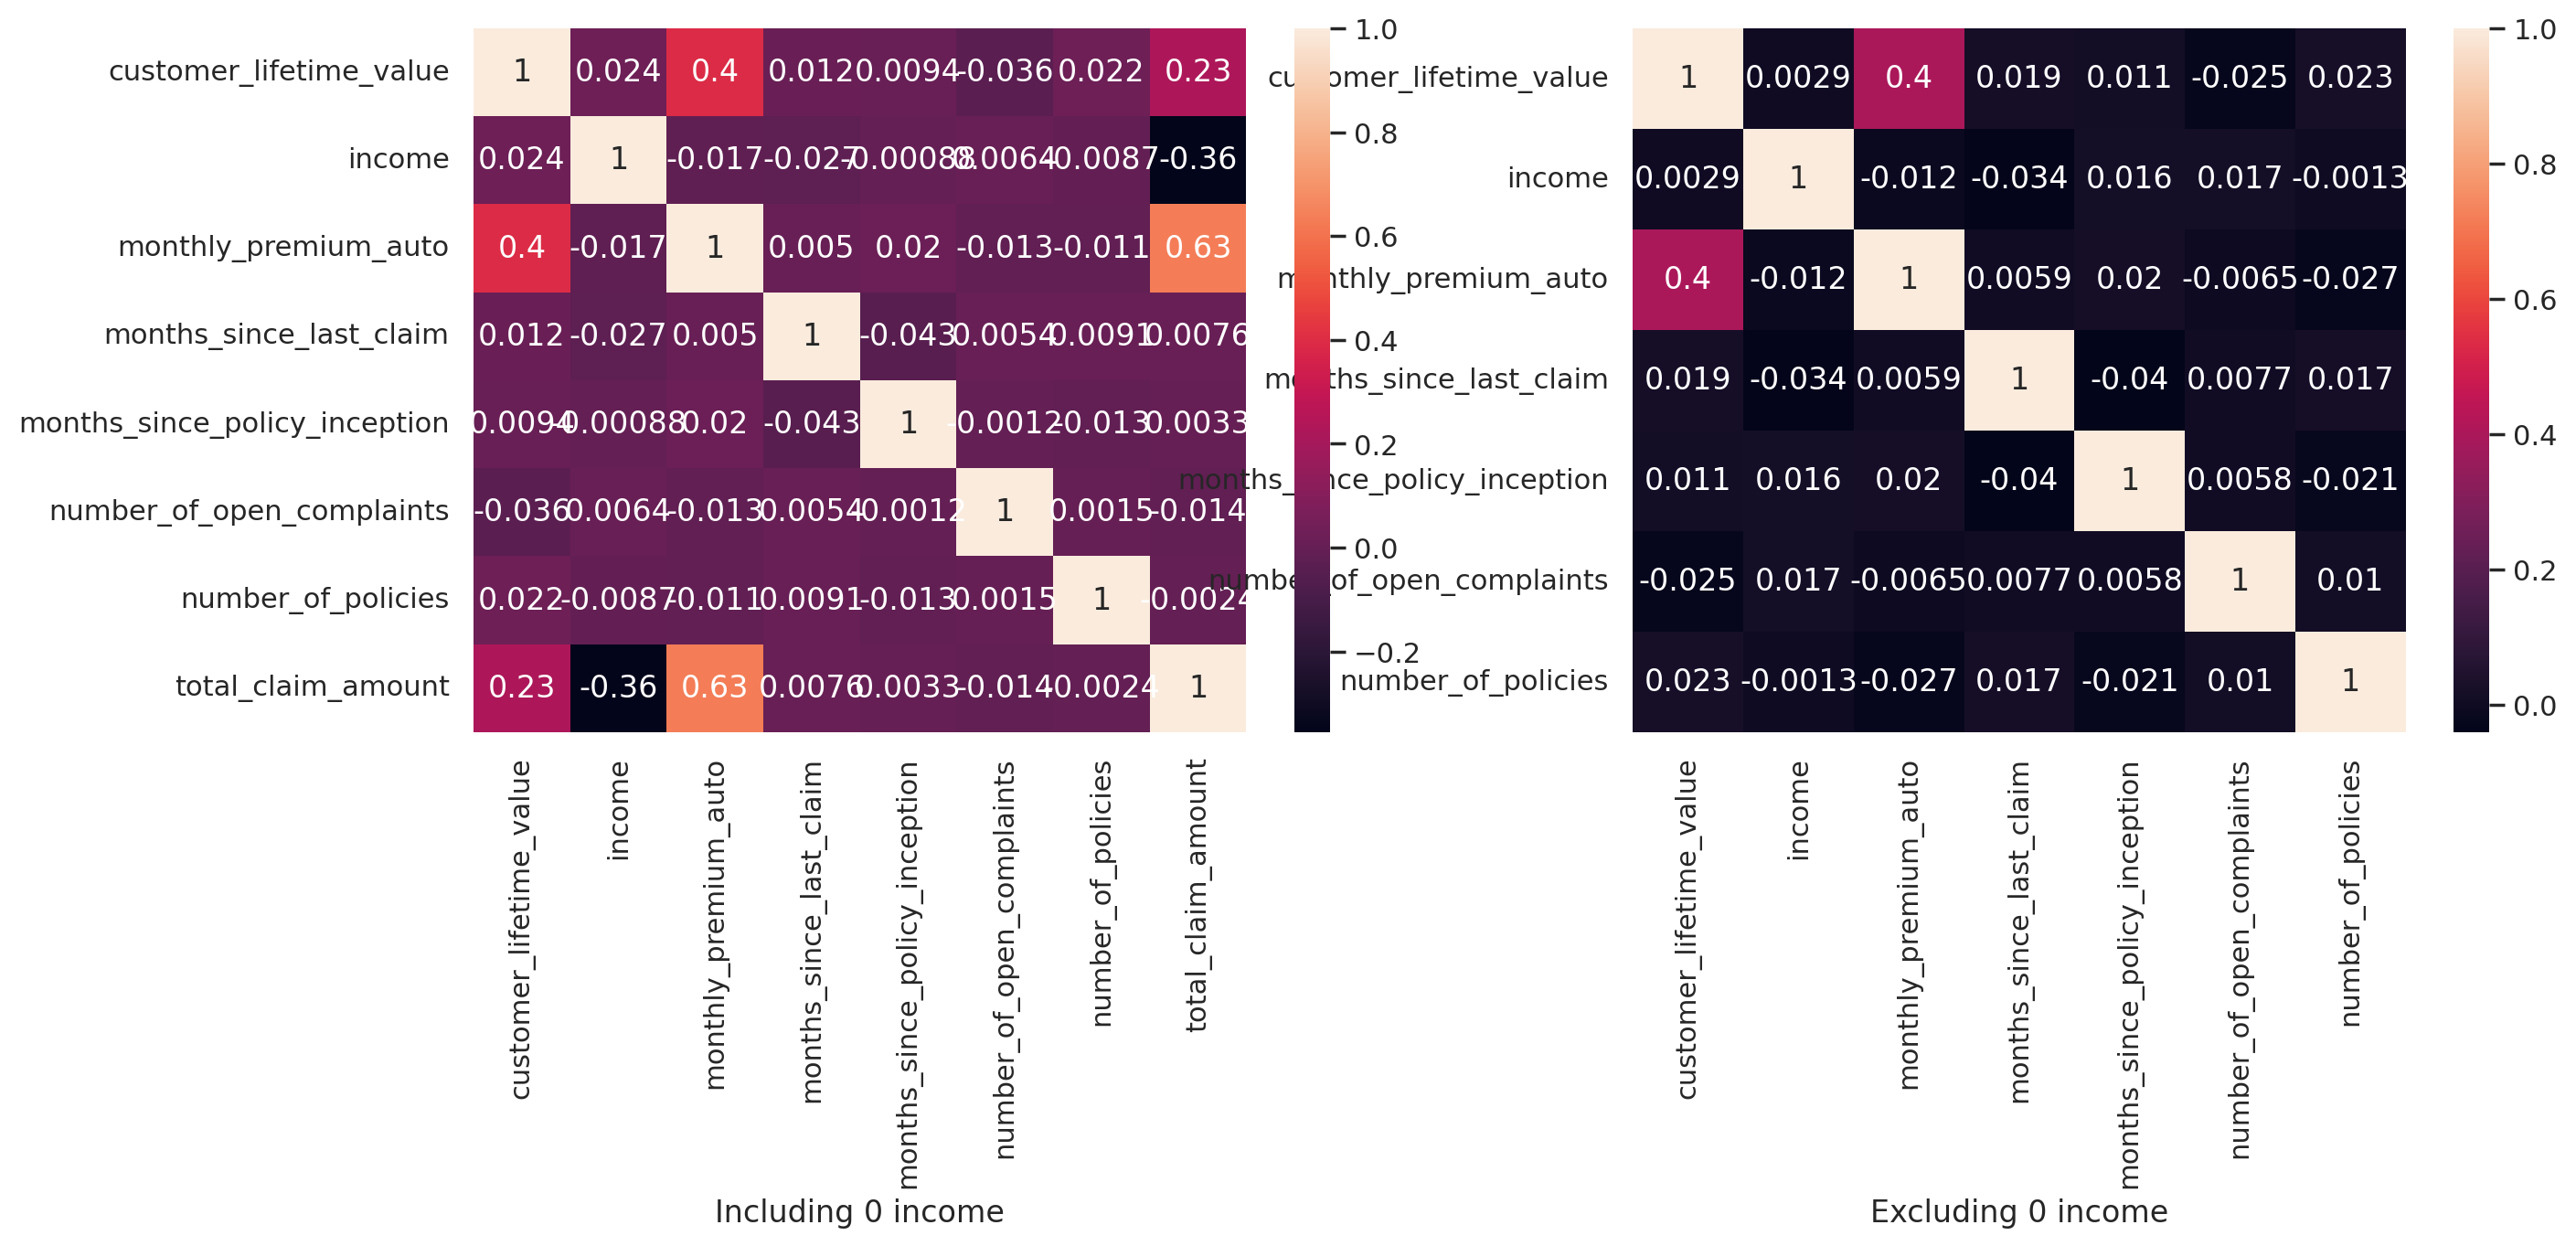



Linear regression, X and y train / test

This is the shape of X train: 
 (4771, 7)
This is the shape of X test: 
 (2046, 7)
This is the shape of y train: 
 (4771,)
This is the shape of y test: 
 (2046,)


Error tests

R2 train = 0.4429
R2 test = 0.4688

RMSE train = 189.8229
RMSE test = 181.2082

MAE train = 134.6550
MAE test = 131.0287

MSE train = 36032.7391
MAE test = 32836.4216


In [24]:
cleaner_processor(data)

<h1><h1>

<h4>We will now reshape the values with a normalization and then Power Transformer<h4>

In [29]:
data_tr= data_tr.drop_duplicates()
data_tr = data_tr.reset_index(drop = True)
cols = []
for col in data_tr.columns:
    cols.append(col.lower().replace(' ', '_'))
data_tr.columns = cols
data_tr= data_tr.select_dtypes(include = np.number)
data_tr = data_tr.round(decimals = 2)
data_tr = data_tr[data_tr.income != 0]
X_nrm = data_tr

In [30]:
transformer = MinMaxScaler().fit(X_nrm)
x_nrm = transformer.transform(X_nrm)
x_nrm = pd.DataFrame(x_nrm, columns=X_nrm.columns)
x_nrm

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,0.007926,0.514064,0.033898,0.914286,0.050505,0.0,0.000,0.132973
1,0.132596,0.430601,0.199153,0.514286,0.383838,0.0,0.125,0.195763
2,0.008544,0.375778,0.050847,0.342857,0.444444,0.0,0.000,0.047709
3,0.075566,0.587755,0.033898,0.400000,0.949495,0.0,0.125,0.055054
4,0.040158,0.503791,0.025424,0.000000,0.131313,0.0,1.000,0.111125
...,...,...,...,...,...,...,...,...
5887,0.174147,0.562672,0.309322,0.885714,0.424242,0.0,0.125,0.222284
5888,0.035863,0.626279,0.012712,0.171429,0.484848,0.0,0.250,0.106148
5889,0.024389,0.419417,0.182203,0.457143,0.585859,0.0,0.000,0.187056
5890,0.262126,0.688250,0.050847,0.514286,0.898990,0.0,0.125,0.068483


In [31]:
transformer = PowerTransformer().fit(x_nrm) #default value is a Yeo-Johnson transform.
x_tr = transformer.transform(X_nrm)
x_tr = pd.DataFrame(x_tr, columns=X_nrm.columns)
x_tr

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2.187025,30.952507,2.299154,14.104851,11.153997,-0.517578,1.719934,3.77341
1,2.187025,30.759001,2.299154,11.849218,49.672751,-0.517578,2.002826,3.77341
2,2.187025,30.612529,2.299154,10.249814,54.661519,-0.517578,1.719934,3.77341
3,2.187025,31.100473,2.299154,10.857690,88.472538,-0.517578,2.002826,3.77341
4,2.187025,30.930319,2.299154,-1.690418,23.701985,-0.517578,2.118013,3.77341
...,...,...,...,...,...,...,...,...
5887,2.187025,31.052177,2.299154,13.981300,53.032333,-0.517578,2.002826,3.77341
5888,2.187025,31.170956,2.299154,7.552311,57.829101,-0.517578,2.071403,3.77341
5889,2.187025,30.730522,2.299154,11.384632,65.293858,-0.517578,1.719934,3.77341
5890,2.187025,31.276022,2.299154,11.849218,85.514411,-0.517578,2.002826,3.77341


In [32]:
X = x_tr.drop(['total_claim_amount'], axis=1)
y = x_tr['total_claim_amount']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=75)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4124, 7)
(1768, 7)
(4124,)
(1768,)


In [34]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [35]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

<h4>-R2<h4>

In [36]:
print(f'R2 train = {r2_score(y_train, y_pred_train):.4f}')
print(f'R2 test = {r2_score(y_test, y_pred_test):.4f}')

R2 train = 0.0016
R2 test = -0.0060


<h6><h6>

<h4>-RMSE<h4>

In [37]:
print(f'RMSE train = {(np.sqrt(mean_squared_error(y_train,y_pred_train))):.4f}')
print(f'RMSE test = {(np.sqrt(mean_squared_error(y_test,y_pred_test))):.4f}')

RMSE train = 0.0680
RMSE test = 0.0405


<h6><h6>

<h4>-MAE<h4>

In [38]:
print (f'MAE train = {(metrics.mean_absolute_error(y_train, y_pred_train)):.4f}')
print (f'MAE test = {(metrics.mean_absolute_error(y_test, y_pred_test)):.4f}')

MAE train = 0.0046
MAE test = 0.0041


<h6><h6>

<h4>-MSE<h4>

In [39]:
print (f'MSE train = {(metrics.mean_squared_error(y_train, y_pred_train)):.4f}')
print (f'MAE test = {(metrics.mean_squared_error(y_test, y_pred_test)):.4f}')

MSE train = 0.0046
MAE test = 0.0016


The values are now very small compared to the original ones. This is because the Power Transformer is like zooming inside a dataset, and since we had already removed the zero income values (which impacted heavily the income column) and we zoomed in even more into the data, we have a portion of it that looks way more normalized than originally.

However, it has lost a lot of precission since R2 value is much more smaller.